In [1]:
import scipy.stats as stats
import scipy as sp
from scipy import stats
import math
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

CONFIDENCE INTERVALS

EXERCISE 1. What is the normal body temperature for healthy humans? A random sample of 130 healthy human body temperatures provided by Allen Shoemaker7 yielded 98.25 degrees and standard deviation 0.73 degrees. 

Give a 99% confidence interval for the average body temperature of healthy people.

EXERCISE 2. The administrators for a hospital wished to estimate the average number of days required for inpatient treatment of patients between the ages of 25 and 34. A random sample of 500 hospital patients between these ages produced a mean and standard deviation equal to 5.4 and 3.1 days, respectively.


Construct a 95% confidence interval for the mean length of stay for the population of patients from which the sample was drawn.

HYPOTHESIS TESTING

EXERCISE 3. The hourly wages in a particular industry are normally distributed with mean $13.20 and standard deviation $2.50. A company in this industry employs 40 workers, paying them an average of $12.20 per hour. Can this company be accused of paying substandard wages? Use an α = .01 level test. (Wackerly, Ex.10.18)

CHECK: statistic: -2.5298221281347035, pvalue= 0.005706018193000826

EXERCISE 4.Shear strength measurements derived from unconfined compression tests for two types of soils gave the results shown in the following document (measurements in tons per square foot). Do the soils appear to differ with respect to average shear strength, at the 1% significance level?

Results for two type of soils

CHECK: statistic: 5.1681473319343345, pvalue= 2.593228732352821e-06

EXERCISE 5. The following dataset is based on data provided by the World Bank (https://datacatalog.worldbank.org/dataset/education-statistics). World Bank Edstats.  2015 PISA Test Dataset

1.Get descriptive statistics (the central tendency, dispersion and shape of a dataset’s distribution) for each continent group (AS, EU, AF, NA, SA, OC).
2.Determine whether there is any difference (on the average) for the math scores among European (EU) and Asian (AS) countries (assume normality and equal variances). Draw side-by-side box plots.
CHECK: statistic=0.870055317967983, pvalue=0.38826888111307345

EXERCISE 1:

In [2]:
ci = 0.99
n = 130
mean = 98.25   
std = 0.73
sem = 0.73 / np.sqrt(n)

In [3]:
stats.t.interval(0.99, 129, loc=98.25, scale=0.73/np.sqrt(130))

(98.08260738705933, 98.41739261294067)

EXERCISE 2:

In [4]:
n = 500
mu = 5.4
var = 3.1
ci = 0.95


In [5]:
stats.t.interval(0.95, 499, loc=5.4, scale=3.1/np.sqrt(500))

(5.127617354510309, 5.672382645489692)

EXERCISE 3:

In [6]:
n = 40
sigma = 2.50
mu = 13.20
xbar = 12.20

In [7]:
z_test = (xbar - mu) / (sigma / np.sqrt(n))
z_test


-2.5298221281347035

In [8]:
pvalue = stats.norm.cdf(z_test) # left side area
pvalue

0.005706018193000826

In [9]:
# "p_value" ile "α" value yu karsilastiralim
 
alpha = 0.01   # (α = 1% --> 1-99%) 

if pvalue < alpha:
    print("Reject the Null")
else:
    print("Fail to reject")

Reject the Null


EXERCISE 4:

In [10]:
α = 0.01

In [11]:
df = pd.read_csv("soil - Sheet1.csv")
df

,Soil1,Soil2
0,1.442,1.364
1,1.943,1.878
2,1.110,1.337
3,1.912,1.828
4,1.553,1.371
5,1.641,1.428
6,1.499,1.119
7,1.347,1.373
8,1.685,1.589
9,1.578,1.714


In [12]:
df.head()

,Soil1,Soil2
0,1.442,1.364
1,1.943,1.878
2,1.110,1.337
3,1.912,1.828
4,1.553,1.371


In [13]:
df.shape

(35, 2)

In [14]:
indTest = stats.ttest_ind(df['Soil1'], df['Soil2'], equal_var=True, nan_policy='omit', alternative='two-sided')
indTest

Ttest_indResult(statistic=5.1681473319343345, pvalue=2.59322873235282e-06)

In [50]:
alpha= 0.01
if indTest.pvalue < alpha:
    print("Reject the Null")
else:
    print("Fail to reject the Null")

Fail to reject the Null


EXERCISE 5:

In [51]:
df = pd.read_csv("2015 PISA Test - Sheet1.csv")

df.head()

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
0,ALB,EU,63.252933,413.1570,405.2588,427.2250
1,ARE,AS,90.500000,427.4827,433.5423,436.7311
2,ARG,SA,68.043064,409.0333,425.3031,432.2262
3,AUS,OC,84.560519,493.8962,502.9006,509.9939
4,AUT,EU,83.940142,496.7423,484.8656,495.0375


In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
internet_users_per_100,70.0,71.973099,16.390632,21.976068,60.899020,72.99935,85.026763,98.2000
Math,70.0,460.971557,53.327205,327.702000,417.416075,477.60715,500.482925,564.1897
Reading,70.0,460.997291,49.502679,346.549000,426.948625,480.19985,499.687475,535.1002
Science,70.0,465.439093,48.397254,331.638800,425.923375,475.40005,502.431250,555.5747


In [18]:
df.shape

(70, 6)

In [19]:
df.groupby("Continent_Code").mean()

,internet_users_per_100,Math,Reading,Science
Continent_Code,,,,
AF,43.359918,363.212100,355.457400,381.074250
AS,68.455613,466.216647,454.059682,467.945847
EU,77.274888,477.981449,476.164608,478.299381
OC,86.391704,494.559750,506.085650,511.648700
SA,60.180494,402.887700,425.359229,421.747186


In [20]:
df.groupby("Continent_Code")["internet_users_per_100"].describe()

,count,mean,std,min,25%,50%,75%,max
Continent_Code,,,,,,,,
AF,2.0,43.359918,7.297226,38.200000,40.779959,43.359918,45.939877,48.519836
AS,17.0,68.455613,21.086060,21.976068,50.300000,74.000000,84.948353,92.884826
EU,37.0,77.274888,12.425773,53.744979,68.632900,76.184000,87.479056,98.200000
OC,2.0,86.391704,2.589686,84.560519,85.476112,86.391704,87.307296,88.222889
SA,7.0,60.180494,9.772455,40.900000,57.116462,64.289000,66.321532,69.198471


In [21]:
df.groupby("Continent_Code")["Reading"].describe()

,count,mean,std,min,25%,50%,75%,max
Continent_Code,,,,,,,,
AF,2.0,355.457400,7.916909,349.8593,352.658350,355.45740,358.256450,361.0555
AS,17.0,454.059682,57.048962,346.5490,408.102200,433.54230,508.690500,535.1002
EU,37.0,476.164608,37.720545,351.7415,452.514300,487.25010,499.814600,526.4247
OC,2.0,506.085650,4.504341,502.9006,504.493125,506.08565,507.678175,509.2707
SA,7.0,425.359229,19.709688,397.5414,416.126900,425.30310,431.922700,458.5709


In [22]:
df.groupby("Continent_Code")["Math"].describe()

,count,mean,std,min,25%,50%,75%,max
Continent_Code,,,,,,,,
AF,2.0,363.212100,5.099513,359.6062,361.409150,363.21210,365.015050,366.8180
AS,17.0,466.216647,64.356490,380.2590,403.833200,459.81600,531.296100,564.1897
EU,37.0,477.981449,35.150403,371.3114,464.040100,489.72870,503.722000,521.2506
OC,2.0,494.559750,0.938401,493.8962,494.227975,494.55975,494.891525,495.2233
SA,7.0,402.887700,18.128894,377.0695,388.102200,409.03330,417.617650,422.6714


In [23]:
df.groupby("Continent_Code")["Science"].describe()

,count,mean,std,min,25%,50%,75%,max
Continent_Code,,,,,,,,
AF,2.0,381.074250,7.536556,375.7451,378.409675,381.07425,383.738825,386.4034
AS,17.0,467.945847,56.671371,386.4854,417.611200,456.48360,523.277400,555.5747
EU,37.0,478.299381,34.450616,383.6824,460.774900,490.22500,501.936900,534.1937
OC,2.0,511.648700,2.340241,509.9939,510.821300,511.64870,512.476100,513.3035
SA,7.0,421.747186,18.470319,396.6836,408.205450,424.59050,433.794600,446.9561


In [24]:
df

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
0,ALB,EU,63.252933,413.1570,405.2588,427.2250
1,ARE,AS,90.500000,427.4827,433.5423,436.7311
2,ARG,SA,68.043064,409.0333,425.3031,432.2262
3,AUS,OC,84.560519,493.8962,502.9006,509.9939
4,AUT,EU,83.940142,496.7423,484.8656,495.0375
...,...,...,...,...,...,...
65,TUN,AF,48.519836,366.8180,361.0555,386.4034
66,TUR,EU,53.744979,420.4540,428.3351,425.4895
67,URY,SA,64.600000,417.9919,436.5721,435.3630
68,USA,NaN,74.554202,469.6285,496.9351,496.2424


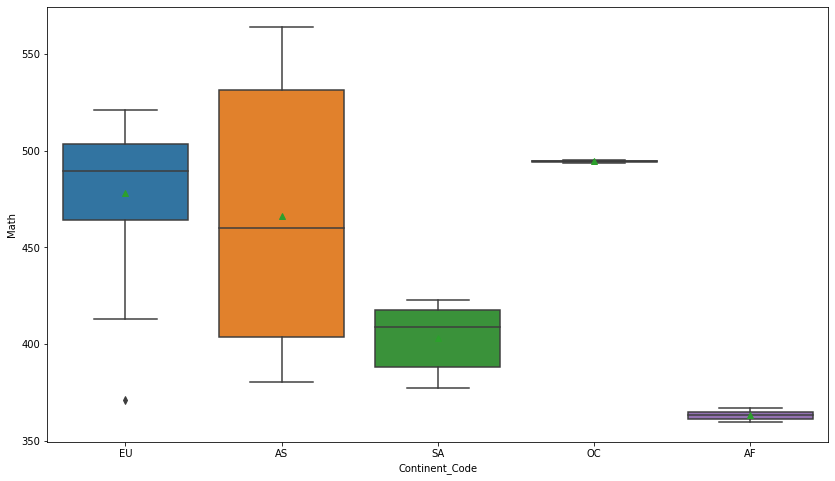

In [25]:
plt.figure(figsize=(14,8))
sns.boxplot(data=df, x="Continent_Code", y="Math", showmeans=True);

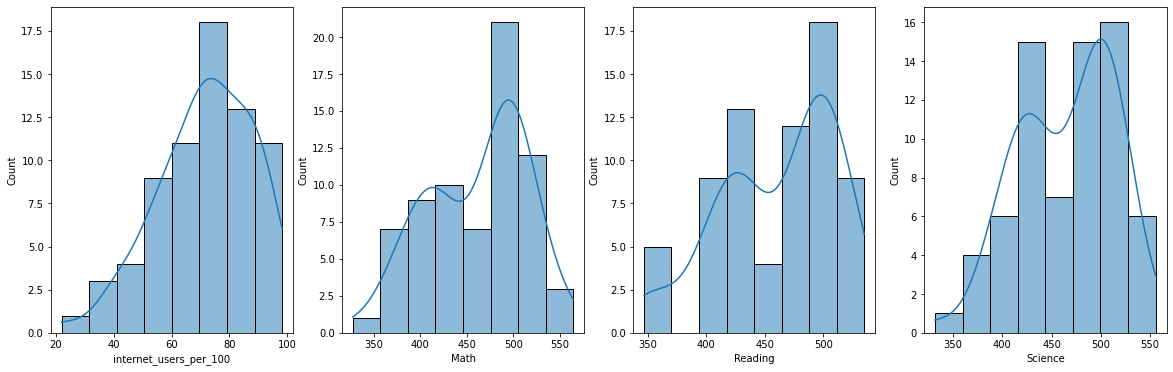

In [26]:
fig, axes = plt.subplots(1,4, figsize=(20,6))

sns.histplot(df['internet_users_per_100'], kde=True, ax=axes[0])
sns.histplot(df['Math'], kde=True, ax=axes[1])
sns.histplot(df['Reading'], kde=True, ax=axes[2])
sns.histplot(df['Science'], kde=True, ax=axes[3]);

In [27]:
dfEU = df[df["Continent_Code"]=="EU"]
dfEU.head()

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
0,ALB,EU,63.252933,413.1570,405.2588,427.2250
4,AUT,EU,83.940142,496.7423,484.8656,495.0375
5,BEL,EU,85.052900,506.9844,498.5242,501.9997
6,BGR,EU,56.656300,441.1899,431.7175,445.7720
9,CHE,EU,87.479056,521.2506,492.1982,505.5058


In [28]:
df[df["Continent_Code"]=="EU"].describe()

,internet_users_per_100,Math,Reading,Science
count,37.000000,37.000000,37.000000,37.000000
mean,77.274888,477.981449,476.164608,478.299381
std,12.425773,35.150403,37.720545,34.450616
min,53.744979,371.311400,351.741500,383.682400
25%,68.632900,464.040100,452.514300,460.774900
50%,76.184000,489.728700,487.250100,490.225000
75%,87.479056,503.722000,499.814600,501.936900
max,98.200000,521.250600,526.424700,534.193700


In [29]:
dfEU.shape

(37, 6)

In [30]:
dfEU.var()

internet_users_per_100     154.399841
Math                      1235.550805
Reading                   1422.839540
Science                   1186.844969
dtype: float64

In [31]:
np.sqrt(1235.550805)

35.15040262927297

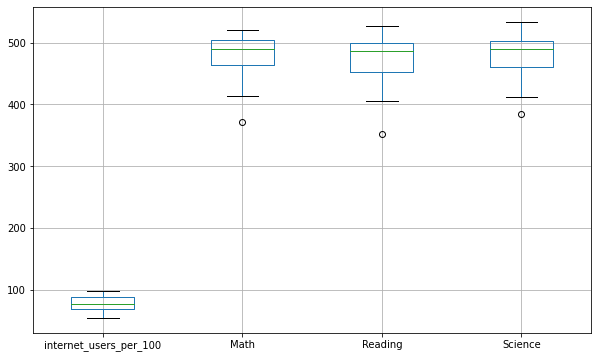

In [32]:
dfEU.boxplot(figsize=(10,6));

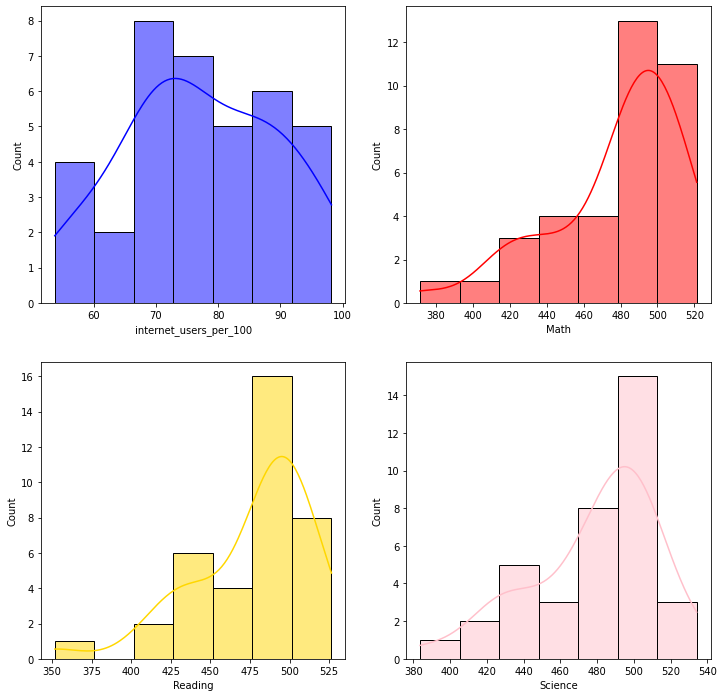

In [33]:
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

sns.histplot(data=dfEU, x="internet_users_per_100", kde=True, color="blue", ax=axs[0, 0])
sns.histplot(data=dfEU, x="Math", kde=True, color="red", ax=axs[0, 1])
sns.histplot(data=dfEU, x="Reading", kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=dfEU, x="Science", kde=True, color="pink", ax=axs[1, 1]);

In [34]:
dfAS = df[df["Continent_Code"]=="AS"]
dfAS

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
1,ARE,AS,90.500000,427.4827,433.5423,436.7311
11,CHN,AS,50.300000,531.2961,493.9412,517.7793
25,GEO,AS,47.569760,403.8332,401.2881,411.1315
27,HKG,AS,84.948353,547.9310,526.6753,523.2774
30,IDN,AS,21.976068,386.1096,397.2595,403.0997
33,ISR,AS,77.352090,469.6695,478.9606,466.5528
35,JOR,AS,60.114383,380.2590,408.1022,408.6691
36,JPN,AS,91.058028,532.4399,515.9585,538.3948
37,KAZ,AS,72.900000,459.8160,427.1410,456.4836
38,KOR,AS,89.648631,524.1062,517.4367,515.8099


In [35]:
dfAS.shape

(17, 6)

In [36]:
dfAS.describe()

,internet_users_per_100,Math,Reading,Science
count,17.000000,17.000000,17.000000,17.000000
mean,68.455613,466.216647,454.059682,467.945847
std,21.086060,64.356490,57.048962,56.671371
min,21.976068,380.259000,346.549000,386.485400
25%,50.300000,403.833200,408.102200,417.611200
50%,74.000000,459.816000,433.542300,456.483600
75%,84.948353,531.296100,508.690500,523.277400
max,92.884826,564.189700,535.100200,555.574700


In [37]:
dfAS.var()

internet_users_per_100     444.621918
Math                      4141.757822
Reading                   3254.584049
Science                   3211.644321
dtype: float64

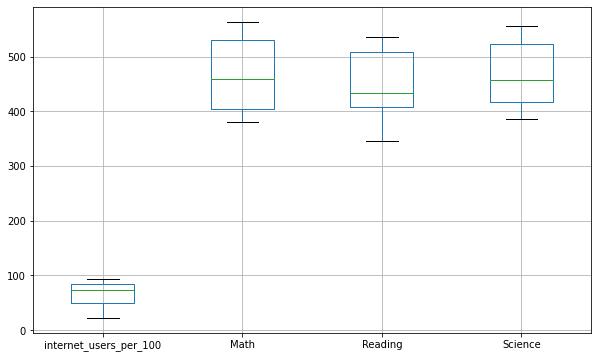

In [38]:
dfAS.boxplot(figsize=(10, 6));

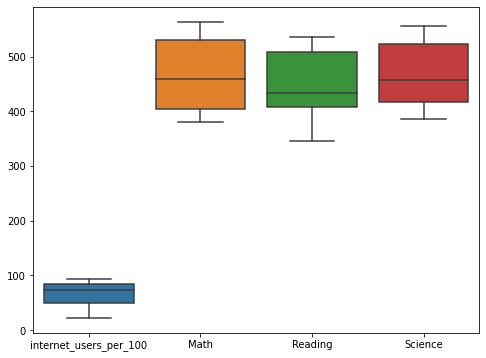

In [39]:
fig = plt.subplots(figsize=(8, 6))

sns.boxplot(data=dfAS);

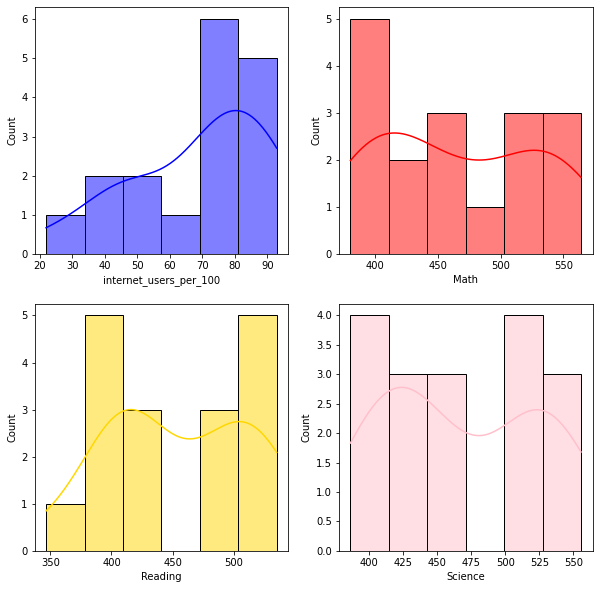

In [40]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

sns.histplot(data=dfAS, x="internet_users_per_100", kde=True, color="blue", ax=axs[0, 0])
sns.histplot(data=dfAS, x="Math", kde=True, color="red", ax=axs[0, 1])
sns.histplot(data=dfAS, x="Reading", kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=dfAS, x="Science", kde=True, color="pink", ax=axs[1, 1]);

In [41]:
df[df["Continent_Code"]=="AS"].describe()

,internet_users_per_100,Math,Reading,Science
count,17.000000,17.000000,17.000000,17.000000
mean,68.455613,466.216647,454.059682,467.945847
std,21.086060,64.356490,57.048962,56.671371
min,21.976068,380.259000,346.549000,386.485400
25%,50.300000,403.833200,408.102200,417.611200
50%,74.000000,459.816000,433.542300,456.483600
75%,84.948353,531.296100,508.690500,523.277400
max,92.884826,564.189700,535.100200,555.574700


In [42]:
dfEU.Math.describe()

count     37.000000
mean     477.981449
std       35.150403
min      371.311400
25%      464.040100
50%      489.728700
75%      503.722000
max      521.250600
Name: Math, dtype: float64

In [43]:
dfAS.Math.describe()

count     17.000000
mean     466.216647
std       64.356490
min      380.259000
25%      403.833200
50%      459.816000
75%      531.296100
max      564.189700
Name: Math, dtype: float64

In [44]:
mathmeandiff = (dfEU.Math.mean()) - (dfAS.Math.mean())

mathmeandiff

11.764801589825197

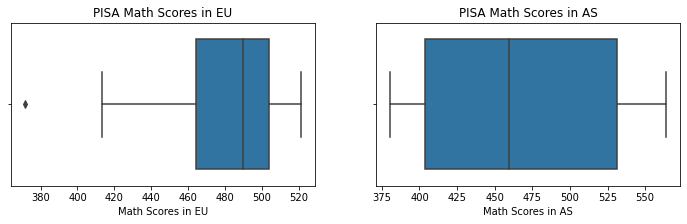

In [45]:
fig, axes = plt.subplots(1,2, figsize=(12,3))

sns.boxplot(dfEU['Math'], ax=axes[0]).set(title='PISA Math Scores in EU')
sns.boxplot(dfAS['Math'], ax=axes[1]).set(title='PISA Math Scores in AS')

axes[0].set(xlabel='Math Scores in EU')
axes[1].set(xlabel='Math Scores in AS');

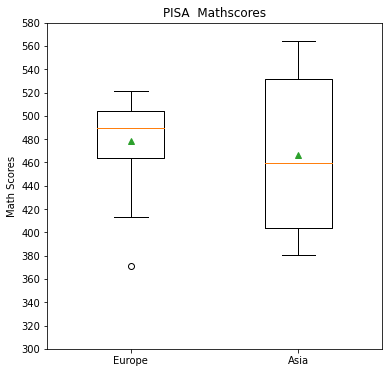

In [46]:
plt.figure(figsize=(6,6))
plt.boxplot([dfEU['Math'],dfAS['Math']], showmeans=True, widths = 0.4)

plt.title('PISA  Mathscores')
plt.ylabel('Math Scores')
plt.xticks([1, 2], ['Europe', 'Asia'])
y_ticks = np.arange(300, 600, 20)
plt.yticks(y_ticks);

In [47]:
indTest = stats.ttest_ind(df[df["Continent_Code"]=="EU"]["Math"], df[df["Continent_Code"]=="AS"]["Math"], equal_var=True, alternative='two-sided')
indTest

Ttest_indResult(statistic=0.870055317967983, pvalue=0.38826888111307345)

In [48]:
EU = df[df['Continent_Code']=='EU'].Math
AS = df[df['Continent_Code']=='AS'].Math
Mathstatistic, Mathpvalue = stats.ttest_ind(EU, AS, nan_policy='omit')  

Mathstatistic, Mathpvalue 

(0.870055317967983, 0.38826888111307345)

In [49]:
critical_pvalue = 0.025

if Mathpvalue < critical_pvalue:
    print("Reject the Null")
else:
    print("Fail to reject")

Fail to reject


SONUC:

Hesaplanan  p value 0.38826888111307345 , sol ve sag kuyruk icin sectigimiz kritik önem seviyesinden daha büyük oldugundan α/2 = 0.025,  fail to reject the null hypothesis sonucuna ulasiriz, EU ve AS deki  matematik puanlarinin birbirinden önemli ölcüde farkli oldugu sonucuna varmak icin istatistiksel olarak yeterli kanit yok 

Sonuclara dayanarak sunlari söyleyebiliriz:

 EU ve AS nin matematik puanlarinin ortalamalari arasinda önemli bir fark yok (t70 = 0.870055317967983, p < .05)

EU da 11.764801589825083 ile ortalama matematik puanlari AS'dekilerden biraz daha yüksektir, ancak aralarinda istatistiksel olarak önemli bir fark yoktur.